In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import os
viridis = matplotlib.cm.get_cmap('viridis')

In [7]:
algo = "convae"
run =  "96"
data = "simulated"
size = ""
base_str = "../randomsearch_"+algo+"_"+data+size+"_clf/"

param_vals = np.load(base_str+"run_"+run+"hyperparam_vals_ours.npy")
losses = np.load(base_str+"run_"+run+"loss_vals_ours.npy")
performance = np.load(base_str+"run_"+run+"performance_ours.npy")
#print(performance)
n_highest = 25

to_del = []
for i, p in enumerate(performance):
    if len(p[0]) == 2:
        print(i)
        to_del.append(i)

performance = np.array(np.delete(performance, to_del, axis=0))
param_vals = np.array(np.delete(param_vals, to_del, axis=0))
losses = np.array(np.delete(losses, to_del, axis=0))

proton_test_f1 = np.array([p[0][0] for p in performance[:, 1]])
proton_sort_ind = np.flip(np.argsort(proton_test_f1))
sorted_proton_test_f1 = proton_test_f1[proton_sort_ind]

losses = losses[proton_sort_ind][:n_highest]
param_vals = param_vals[proton_sort_ind][:n_highest]
performance = performance[proton_sort_ind][:n_highest]
p = 1
print(len(sorted_proton_test_f1))
print(sorted_proton_test_f1)
print(param_vals[p])
print(performance[p])

43
[0.98666667 0.98546042 0.97906602 0.97697368 0.97536946 0.96478873
 0.95016611 0.94370861 0.93537415 0.92307692 0.92109501 0.91233766
 0.90666667 0.90271132 0.89917355 0.89001692 0.88146912 0.8314239
 0.80622837 0.79386712 0.76460177 0.74509804 0.74087591 0.67486034
 0.65217391 0.65068493 0.60165289 0.58596491 0.56521739 0.55095541
 0.53377265 0.52786885 0.52333333 0.52333333 0.5187602  0.50756303
 0.50326797 0.50082919 0.50082372 0.48903879 0.45874587 0.4460177
 0.        ]
[list([[2, 2, 2, 16, 16, 32], [13, 13, 11, 9, 9, 3], [2, 2, 2, 2, 2, 2], [0, 0, 0, 0, 0, 0], 6])
 list([1000.0, 0.001, 0.8172184331164583, 0.99, 50])
 {'simulated_mode': False, 'restore_mode': False, 'include_KL': False, 'include_MMD': True, 'include_KM:': False, 'batchnorm': False}
 {} None 'lrelu']
[[[0.99777283 0.99778271]
  [0.99777283 0.99778271]
  [0.99777283 0.99778271]]

 [[0.98546042 0.98450947]
  [0.99025974 0.97945205]
  [0.9807074  0.98961938]]]


/opt/conda/envs/python3.6/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in log
  """Entry point for launching an IPython kernel.


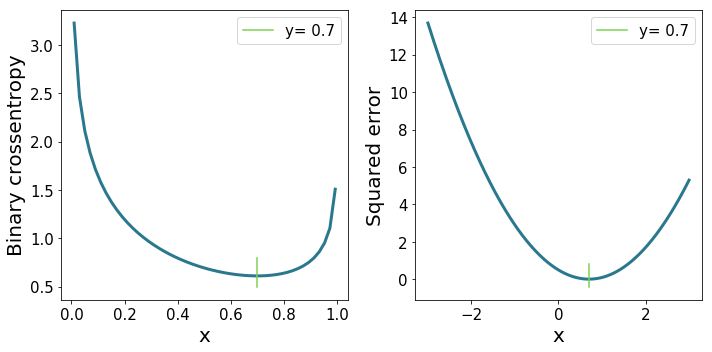

In [3]:
def binary_crossent(x, y=1): return -(y*np.log(x) + (1-y)*np.log(1-x))
def mse(x, y=1): return np.power(x-y, 2)

x = np.linspace(-3, 3, 300)
y = [0.7, ] #np.linspace(1e-3, 1, 5)

fig, ax = plt.subplots(ncols=2, figsize=(10, 5))
for y_ in y:
    ax[0].plot(x, binary_crossent(x, y_), linewidth=3, color=viridis(0.4))
    ax[0].plot([y_,]*2,[0.5, 0.8], label="y= "+str(y_), color=viridis(0.8))
    ax[0].set_xlabel("x", size=20)
    ax[0].set_ylabel("Binary crossentropy", size=20)
    ax[0].legend(fontsize=15)
    
    ax[1].plot(x, mse(x, y_), linewidth=3, color=viridis(0.4))
    ax[1].plot([y_,]*2,[-0.4, 0.8], label="y= "+str(y_), color=viridis(0.8))
    ax[1].set_xlabel("x", size=20)
    ax[1].set_ylabel("Squared error", size=20)
    ax[1].legend(fontsize=15)
    
    ax[0].tick_params(axis='both', which='major', labelsize=15)
    ax[1].tick_params(axis='both', which='major', labelsize=15)

plt.tight_layout()

In [8]:
print(performance.shape)
print("experiments, train/test, scores, classes")
print(performance[0])

(25, 2, 3, 2)
experiments, train/test, scores, classes
[[[0.98813376 0.98739977]
  [0.99890949 0.97621744]
  [0.97758805 0.99884125]]

 [[0.98132428 0.98199673]
  [1.         0.96463023]
  [0.96333333 1.        ]]]


In [9]:
losses.shape

(25, 2, 2000)

In [17]:
a = [print(h[-1], h[0]) for h in param_vals]

lrelu {'read_N': 40, 'write_N': 40, 'write_N_sq': 1600, 'delta_w': 0.6632653061224489, 'delta_r': 0.8102040816326531}
relu {'read_N': 5, 'write_N': 20, 'write_N_sq': 400, 'delta_w': 1.2510204081632654, 'delta_r': 0.9081632653061225}
None [[4, 4, 4, 4, 2, 2], [11, 11, 11, 11, 9, 3], [2, 2, 2, 2, 2, 2], [0, 0, 0, 0, 0, 0], 6]
relu {'read_N': 5, 'write_N': 12, 'write_N_sq': 144, 'delta_w': 0.8591836734693878, 'delta_r': 0.7448979591836735}
None [[2, 2, 16, 64], [11, 11, 7, 3], [2, 2, 2, 2], [0, 0, 0, 0], 4]
None [[16, 16, 16, 16, 2], [11, 11, 11, 11, 3], [2, 2, 2, 2, 2], [0, 0, 0, 0, 0], 5]
lrelu {'read_N': 60, 'write_N': 20, 'write_N_sq': 400, 'delta_w': 0.9408163265306123, 'delta_r': 0.9571428571428572}
None [[8, 8, 8, 8, 4], [11, 11, 11, 9, 3], [2, 2, 2, 2, 2], [0, 0, 0, 0, 0], 5]
None [[4, 2, 2, 2, 8], [11, 7, 7, 7, 3], [2, 2, 2, 2, 2], [0, 0, 0, 0, 0], 5]
None [[16, 16, 16, 32, 4], [11, 11, 11, 9, 3], [2, 2, 2, 2, 2], [0, 0, 0, 0, 0], 5]
tanh {'read_N': 40, 'write_N': 5, 'write_N_sq'

0.9866666666666667
0.9866666666666667
0.9854604200323102
0.9854604200323102
0.9790660225442833
0.9790660225442833
0.9769736842105264
0.9769736842105264
0.9753694581280787
0.9753694581280787
0.9501661129568106
0.9501661129568106
0.9437086092715231
0.9437086092715231
0.9230769230769231
0.9230769230769231


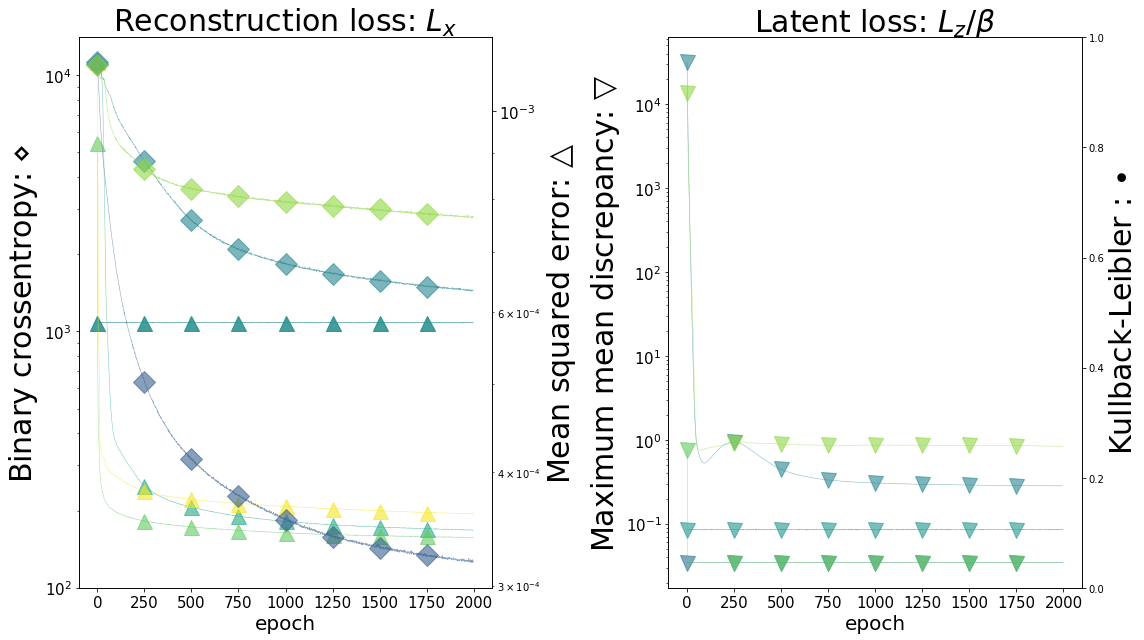

In [9]:
loss_names = [r"$L_x$", r"$L_z/\beta$"]
n_plot = 10
fig, ax = plt.subplots(ncols=losses.shape[1], figsize=(16, 9))
colors = viridis(np.linspace(0.3, max(sorted_proton_test_f1), n_plot))
ax2 = ax[0].twinx()
ax3 = ax[1].twinx()

#fig.suptitle("Loss curves from simulated parameter search", size=35)

label_size = 30
ax[1].set_ylabel(r"Maximum mean discrepancy: $\bigtriangledown$", size=label_size)
ax3.set_ylabel(r"Kullback-Leibler : $\bullet$", size=label_size)

ax2.set_ylabel(r"Mean squared error: $\bigtriangleup$", size=label_size)
ax[0].set_ylabel(r"Binary crossentropy: $\diamond$", size=label_size)

ax[0].set_title(r"Reconstruction loss: "+loss_names[0], size=30)
ax[1].set_title("Latent loss: "+loss_names[1], size=30)

for j in range(n_plot):
    if j == 5:
        continue
    if j == 8:
        continue
    for i, a in enumerate(ax):
        if i == 1:
            beta = param_vals[j][1][0]
            mode = param_vals[j][2]
            which = None
            for l, v in mode.items():
                if v:
                    if l != "batchnorm":
                        which = l
            if which == "include_KL":
                fmt = "o-"
                a = ax3
            elif which == "include_MMD":
                fmt = "v-"
                a = ax[1]
            else:
                fmt = "-"
        else:
            beta = 1
            if np.any(losses[j, i, :][50:]>1e1):
                fmt = "^-"
            else:
                fmt = "D-"
                a = ax2
        loss = losses[j, i, 2:]/beta
        a.semilogy(
            np.arange(loss.shape[0]),
            loss,
            fmt,
            markevery=250,
            color=colors[j],
            markersize=15,
            linewidth=0.5,
            alpha=0.6
        )
        print(sorted_proton_test_f1[j])
        a.tick_params(axis='both', which='major', labelsize=15)
        a.set_xlabel("epoch", size=20)

#ax[0].set_yscale("linear")
ax[0].set_yticks([1e4, 1e3, 1e2])
plt.tight_layout()
plt.savefig("../plots/convae_simulated_clf/randomsearch_loss"+algo+".png")
plt.savefig("../plots/convae_simulated_clf/randomsearch_loss"+algo+".pdf")

In [7]:
import pandas as pd 
columns = [
    "proton f1 score",
    "N parameters",
    "largest kernel",
    "N layers",
    "latent dimension",
    "latent loss",
    "reconstruction loss",
    "activation function",
    "batchnorm",
    r"$\beta$",
    r"$\beta_1$",
    r"$\eta$",
]

categorical_cols = [
    "latent loss",
    "reconstruction loss",
    "activation function",
]
param_performance = np.zeros((performance.shape[0], len(columns))).astype(object)

for i in range(performance.shape[0]):
    config = param_vals[i]
    p_f1 = sorted_proton_test_f1[i]
    n_params = 0
    for f, k in zip(config[0][0], config[0][1]):
        n_params += k**2*f
    n_layers = config[0][4]
    end_size = 80/(2**n_layers)
    beta1 = config[1][2]
    beta = config[1][1]
    latent_dim = config[1][4]
    eta=config[1][1]
    mode_config = config[2]
    batchnorm = mode_config["batchnorm"]
    
    latent_loss = "mmd" if mode_config["include_MMD"] else "kld"
    if latent_loss == "kld":
        latent_loss = latent_loss if mode_config["include_KL"] else "none"
    
    reconst_loss = config[4]
    if reconst_loss is None:
        reconst_loss = "bce"
        
    activation = config[5] 
    param_performance[i] = [
        p_f1,
        n_params,
        config[0][1][0],
        n_layers,
        latent_dim,
        latent_loss,
        reconst_loss,
        activation,
        batchnorm,
        beta,
        beta1,
        eta
    ]

perf_df = pd.DataFrame(param_performance, columns=columns)

KeyError: 0

In [ ]:
test_df = perf_df.copy()
for c in categorical_cols:
    dummy = pd.get_dummies(test_df[c])
    test_df = pd.concat([test_df, dummy], axis=1)
    test_df = test_df.drop(c, axis=1)

In [ ]:
test_df

In [ ]:
from scipy.stats import spearmanr
test_df = test_df.astype(float)
corr_array = np.zeros((len(test_df.columns), 2))
for i, c in enumerate(test_df.columns):
    w, p = spearmanr(test_df[c], test_df["proton f1 score"])
    corr_array[i] = [w, p]

corr_m = pd.DataFrame(corr_array, columns=[r"$\rho_s$", "p"], index=test_df.columns)

In [ ]:
corr_m

In [ ]:
print(corr_m.to_latex(float_format=lambda x: "{:.2g}".format(x),  escape=False),)

In [ ]:
param_vals[3]

In [ ]:
perf_df

In [ ]:
print(perf_df.to_latex(
    #"../tables/randomsearch_convae_simulated_clf/hyperparams.tex",
    index=False,
    longtable=False,
    float_format=lambda x: "{:.2g}".format(x)
))

In [5]:
with open("../metrics_clf/convae_simulated/f1_scores2000.tex") as fo:
    s = "".join(fo.readlines())
print(s)

 & \multicolumn{3}{c}{Proton} & \multicolumn{3}{c}{Carbon} \\  
 \hline 
 & f1 & recall & precision & f1 & recall & precision\\  
 Train & $ \underset{ \num{+- 7.03e-02 } } {\num{ 0.88 } }  $ & $ \underset{ \num{+- 5.93e-02 } } {\num{ 0.88 } }  $ & $ \underset{ \num{+- 8.56e-02 } } {\num{ 0.86 } }  $ & $ \underset{ \num{+- 4.39e-02 } } {\num{ 0.90 } }  $ & $ \underset{ \num{+- 5.32e-02 } } {\num{ 0.89 } }  $ & $ \underset{ \num{+- 7.37e-02 } } {\num{ 0.87 } }  $ \\ 
  Test & $ \underset{ \num{+- 7.07e-02 } } {\num{ 0.88 } }  $ & $ \underset{ \num{+- 6.40e-02 } } {\num{ 0.89 } }  $ & $ \underset{ \num{+- 7.67e-02 } } {\num{ 0.87 } }  $ & $ \underset{ \num{+- 6.06e-02 } } {\num{ 0.90 } }  $ & $ \underset{ \num{+- 6.80e-02 } } {\num{ 0.89 } }  $ & $ \underset{ \num{+- 7.11e-02 } } {\num{ 0.88 } }  $
 
